In [1]:
from utils import SAVE_PATH

import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
summary_df =  pd.read_csv(SAVE_PATH + "\\dropout_model_summary.csv")

In [5]:
summary_df

,p_act,learning_rate,weight_decay,save_file,batch_size,numIters,time,eval_acc,loss_min,loss_mean,loss_max,train_acc_min,train_acc_mean,train_acc_max,val_acc_min,val_acc_mean,val_acc_max
0,1.000,0.01,0.00001,\test_full_dropout_model_1,64,15000,170.39,0.4690,1.097353,1.630527,1.630527,0.06250,0.417892,0.417892,0.087,0.413960,0.413960
1,0.875,0.01,0.00001,\test_full_dropout_model_2,64,15000,168.57,0.4630,1.231398,1.906427,1.906427,0.03125,0.359465,0.359465,0.113,0.415220,0.415220
2,0.750,0.01,0.00001,\test_full_dropout_model_3,64,15000,169.46,0.4274,1.490139,2.578831,2.578831,0.03125,0.308729,0.308729,0.085,0.416373,0.416373
3,0.625,0.01,0.00001,\test_full_dropout_model_4,64,15000,59.63,0.3541,NaN,NaN,NaN,0.00000,0.078869,0.078869,NaN,NaN,NaN
4,0.500,0.01,0.00001,\test_full_dropout_model_5,64,15000,9.09,0.1000,NaN,NaN,NaN,0.00000,0.006645,0.006645,NaN,NaN,NaN


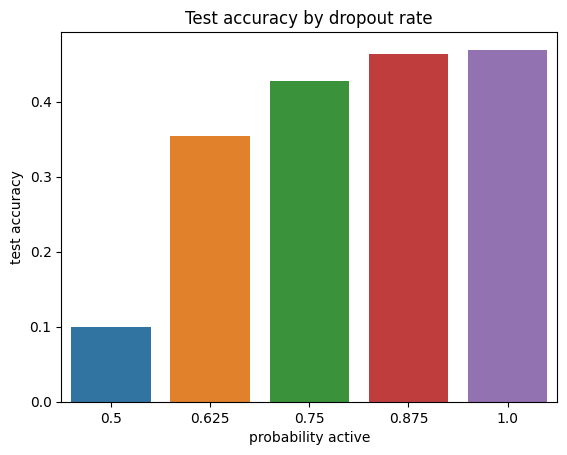

In [26]:
ax = sns.barplot(data=summary_df, x="p_act", y="eval_acc")

_ = ax.set(ylabel = "test accuracy", 
           xlabel = "probability active",
           title= "Test accuracy by dropout rate")

In [30]:
train_val_df = summary_df.melt(id_vars=['p_act'], value_vars=['train_acc_mean', 'val_acc_mean'])

In [31]:
train_val_df

,p_act,variable,value
0,1.000,train_acc_mean,0.417892
1,0.875,train_acc_mean,0.359465
2,0.750,train_acc_mean,0.308729
3,0.625,train_acc_mean,0.078869
4,0.500,train_acc_mean,0.006645
5,1.000,val_acc_mean,0.413960
6,0.875,val_acc_mean,0.415220
7,0.750,val_acc_mean,0.416373
8,0.625,val_acc_mean,NaN
9,0.500,val_acc_mean,NaN


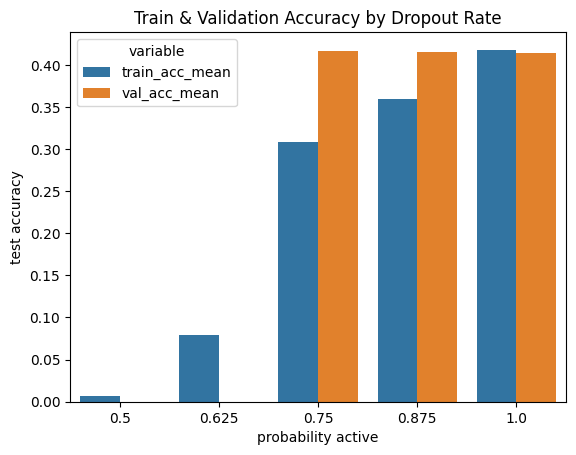

In [34]:
ax = sns.barplot(data=train_val_df, x='p_act', y="value", hue="variable")

_ = ax.set(ylabel = "test accuracy", 
           xlabel = "probability active",
           title= "Train & Validation Accuracy by Dropout Rate")

In [12]:
max_row = summary_df["eval_acc"].idxmax()
file = summary_df["save_file"][max_row]
fig_path = SAVE_PATH + file + '.png'

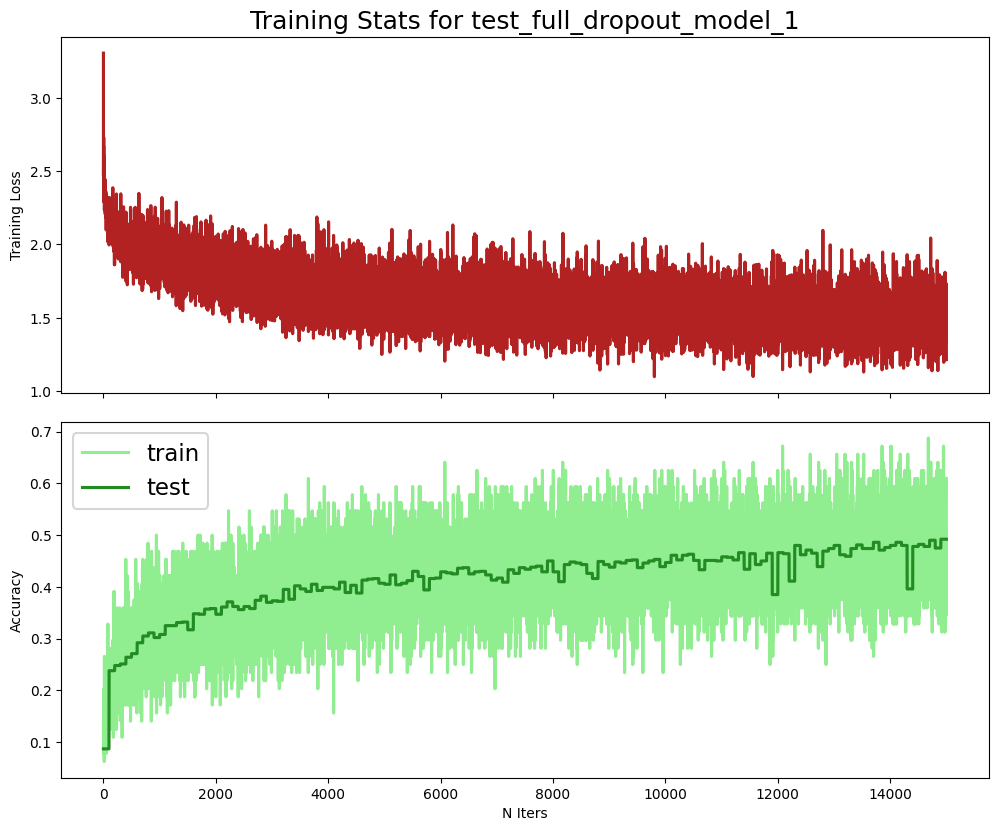

In [13]:
from IPython import display

display.Image(fig_path)

In [14]:
summary_df.iloc[max_row].reset_index()

,index,0
0,p_act,1.0
1,learning_rate,0.01
2,weight_decay,0.00001
3,save_file,\test_full_dropout_model_1
4,batch_size,64
5,numIters,15000
6,time,170.39
7,eval_acc,0.469
8,loss_min,1.097353
9,loss_mean,1.630527
